# Project Description:

In this project the salary evolvment of MBA players between 1985 and 2015 is analyzed. 

For this analysis a [data set](http://www.seanlahman.com/baseball-archive/statistics/) provided by SeanLahman.com is used. It contains statistics related to the MBA frome the year 1871 to 2015.
We use the salary related part of the statistics in the data set that start in the year 1985, as basis for your evaluation

# Import Libaries

In [178]:
import os
import io
import urllib.request
import requests 
import zipfile

from IPython.display import display

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

# Set Global Variables

In [6]:
URL = 'http://seanlahman.com/files/database/baseballdatabank-master_2016-03-02.zip'
Path = 'data/core/'

# Project Preparation

## Load all csv files of a folder into a dict of dfs

In [7]:
def get_file_names(path):
    """Gets an folder path and returns names of all csv files contained in the folder

    Args:
        Path to folder

    Returns:
        List of file names
    """
    file_names = os.listdir(path)
    
    file_names = [file for file in file_names if '.csv' in file]
    
    return file_names
    
def load_csv(path):
    """Get the path to a csv file and returns a dataframe

    Args:
        Path of the csv file

    Returns:
        Dataframe of given csv file
    """
    df = pd.read_csv(path)
    
    return df

def load_csv_from_folder(path):
    """Gets an folder path and returns a dict containing dataframes for all csv files in the folder

    Args:
        URL of folder containing csv files

    Returns:
        Dict of dataframes
    """
    file_names = get_file_names(path)
    
    data =  {}
    
    for file in file_names:
        
        data[file] = load_csv(path + file)
    
    return data

## Load the Dataset

In [8]:
def print_heads_of_dict_of_dfs(data):
    """Gets a dict of dataframes and prints the first 5 entries of every dataframe

    Args:
        Dict of dataframes

    Returns:
        None
    """
    for key, df in data.items():
        print(key)
        display(df.head())
        print('----------------------------------------')

In [10]:
# Load the data as df in the var data
data = load_csv_from_folder(Path)
# Inspect the first 5 rows of the dataset
print_heads_of_dict_of_dfs(data)

Schools.csv


,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


----------------------------------------
Master.csv


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


----------------------------------------
HallOfFame.csv


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


----------------------------------------
AwardsPlayers.csv


,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


----------------------------------------
SeriesPost.csv


,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
0,1884,WS,PRO,NL,NYP,AA,3,0,0
1,1885,WS,CHC,NL,STL,AA,3,3,1
2,1886,WS,STL,AA,CHC,NL,4,2,0
3,1887,WS,DTN,NL,STL,AA,10,5,0
4,1888,WS,NYG,NL,STL,AA,6,4,0


----------------------------------------
AwardsManagers.csv


,playerID,awardID,yearID,lgID,tie,notes
0,larusto01,BBWAA Manager of the year,1983,AL,NaN,NaN
1,lasorto01,BBWAA Manager of the year,1983,NL,NaN,NaN
2,andersp01,BBWAA Manager of the year,1984,AL,NaN,NaN
3,freyji99,BBWAA Manager of the year,1984,NL,NaN,NaN
4,coxbo01,BBWAA Manager of the year,1985,AL,NaN,NaN


----------------------------------------
AllstarFull.csv


,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


----------------------------------------
AwardsSharePlayers.csv


,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Cy Young,1956,ML,fordwh01,1.0,16,1.0
1,Cy Young,1956,ML,maglisa01,4.0,16,4.0
2,Cy Young,1956,ML,newcodo01,10.0,16,10.0
3,Cy Young,1956,ML,spahnwa01,1.0,16,1.0
4,Cy Young,1957,ML,donovdi01,1.0,16,1.0


----------------------------------------
Batting.csv


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


----------------------------------------
FieldingOF.csv


,playerID,yearID,stint,Glf,Gcf,Grf
0,allisar01,1871,1,0.0,29.0,0.0
1,ansonca01,1871,1,1.0,0.0,0.0
2,armstbo01,1871,1,0.0,11.0,1.0
3,barkeal01,1871,1,1.0,0.0,0.0
4,barrofr01,1871,1,13.0,0.0,4.0


----------------------------------------
FieldingPost.csv


,playerID,yearID,teamID,lgID,round,POS,G,GS,InnOuts,PO,A,E,DP,TP,PB,SB,CS
0,colliji01,1903,BOS,AL,WS,3B,8,8.0,213.0,9,18,1,1,0,NaN,NaN,NaN
1,crigelo01,1903,BOS,AL,WS,C,8,8.0,213.0,54,7,3,2,0,0.0,9.0,3.0
2,dinnebi01,1903,BOS,AL,WS,P,4,4.0,105.0,2,9,0,0,0,NaN,6.0,1.0
3,doughpa01,1903,BOS,AL,WS,LF,8,8.0,213.0,13,3,1,1,0,NaN,NaN,NaN
4,ferriho01,1903,BOS,AL,WS,2B,8,8.0,213.0,18,23,2,2,0,NaN,NaN,NaN


----------------------------------------
ManagersHalf.csv


,playerID,yearID,teamID,lgID,inseason,half,G,W,L,rank
0,hanlone01,1892,BLN,NL,3,1,56,17,39,12
1,hanlone01,1892,BLN,NL,3,2,77,26,46,10
2,vanhage01,1892,BLN,NL,1,1,11,1,10,12
3,waltzjo99,1892,BLN,NL,2,1,8,2,6,12
4,wardjo01,1892,BRO,NL,1,1,78,51,26,2


----------------------------------------
TeamsFranchises.csv


,franchID,franchName,active,NAassoc
0,ALT,Altoona Mountain City,N,NaN
1,ANA,Los Angeles Angels of Anaheim,Y,NaN
2,ARI,Arizona Diamondbacks,Y,NaN
3,ATH,Philadelphia Athletics,N,PNA
4,ATL,Atlanta Braves,Y,BNA


----------------------------------------
Fielding.csv


,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abercda01,1871,1,TRO,NaN,SS,1,NaN,NaN,1.0,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,NaN,NaN,67.0,72.0,42.0,5.0,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,NaN,NaN,8.0,14.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,NaN,NaN,51.0,3.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN


----------------------------------------
PitchingPost.csv


,playerID,yearID,round,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,becanbu01,1884,WS,NY4,AA,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,0,12,NaN,NaN,NaN
1,keefeti01,1884,WS,NY4,AA,0,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,0,9,NaN,NaN,NaN
2,radboch01,1884,WS,PRO,NL,3,0,3,3,3,...,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN
3,clarkjo01,1885,WS,CHN,NL,0,1,2,2,2,...,NaN,NaN,NaN,NaN,NaN,0,14,NaN,NaN,NaN
4,mccorji01,1885,WS,CHN,NL,3,2,5,5,5,...,NaN,NaN,NaN,NaN,NaN,0,22,NaN,NaN,NaN


----------------------------------------
CollegePlaying.csv


,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


----------------------------------------
Managers.csv


,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr
0,wrighha01,1871,BS1,NaN,1,31,20,10,3.0,Y
1,woodji01,1871,CH1,NaN,1,28,19,9,2.0,Y
2,paborch01,1871,CL1,NaN,1,29,10,19,8.0,Y
3,lennobi01,1871,FW1,NaN,1,14,5,9,8.0,Y
4,deaneha01,1871,FW1,NaN,2,5,2,3,8.0,Y


----------------------------------------
BattingPost.csv


,yearID,round,playerID,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1884,WS,becanbu01,NY4,AA,1,2,0,1,0,...,0,0,NaN,0,0,0.0,NaN,NaN,NaN,NaN
1,1884,WS,bradyst01,NY4,AA,3,10,1,0,0,...,0,0,NaN,0,1,0.0,NaN,NaN,NaN,NaN
2,1884,WS,esterdu01,NY4,AA,3,10,0,3,1,...,0,1,NaN,0,3,0.0,NaN,NaN,NaN,NaN
3,1884,WS,forstto01,NY4,AA,1,3,0,0,0,...,0,0,NaN,0,1,0.0,NaN,NaN,NaN,NaN
4,1884,WS,keefeti01,NY4,AA,2,5,0,1,0,...,0,0,NaN,0,4,0.0,NaN,NaN,NaN,NaN


----------------------------------------
Pitching.csv


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


----------------------------------------
Salaries.csv


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


----------------------------------------
TeamsHalf.csv


,yearID,lgID,teamID,Half,divID,DivWin,Rank,G,W,L
0,1981,NL,ATL,1,W,N,4,54,25,29
1,1981,NL,ATL,2,W,N,5,52,25,27
2,1981,AL,BAL,1,E,N,2,54,31,23
3,1981,AL,BAL,2,E,N,4,51,28,23
4,1981,AL,BOS,1,E,N,5,56,30,26


----------------------------------------
HomeGames.csv


,year.key,league.key,team.key,park.key,span.first,span.last,games,openings,attendance
0,1871,NaN,BS1,BOS01,1871-05-16,1871-10-07,16,16,32600
1,1871,NaN,BS1,NYC01,1871-05-27,1871-05-27,1,1,3000
2,1871,NaN,CH1,CHI01,1871-05-08,1871-09-29,16,15,85500
3,1871,NaN,CH1,NYC01,1871-10-30,1871-10-30,1,1,600
4,1871,NaN,CL1,CIN01,1871-05-13,1871-07-22,2,2,2200


----------------------------------------
Parks.csv


,park.key,park.name,park.alias,city,state,country
0,ALB01,Riverside Park,NaN,Albany,NY,US
1,ALT01,Columbia Park,NaN,Altoona,PA,US
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,US
3,ARL01,Arlington Stadium,NaN,Arlington,TX,US
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Field,Arlington,TX,US


----------------------------------------
Appearances.csv


,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,BS1,NaN,barnero01,31.0,NaN,31,31.0,0,0,...,16,0,15,0,0,0,0,NaN,NaN,NaN
1,1871,BS1,NaN,barrofr01,18.0,NaN,18,18.0,0,0,...,1,0,0,13,0,4,17,NaN,NaN,NaN
2,1871,BS1,NaN,birdsda01,29.0,NaN,29,29.0,0,7,...,0,0,0,0,0,27,27,NaN,NaN,NaN
3,1871,BS1,NaN,conefr01,19.0,NaN,19,19.0,0,0,...,0,0,0,18,0,1,18,NaN,NaN,NaN
4,1871,BS1,NaN,gouldch01,31.0,NaN,31,31.0,0,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN


----------------------------------------
AwardsShareManagers.csv


,awardID,yearID,lgID,playerID,pointsWon,pointsMax,votesFirst
0,Mgr of the year,1983,AL,altobjo01,7,28,7
1,Mgr of the year,1983,AL,coxbo01,4,28,4
2,Mgr of the year,1983,AL,larusto01,17,28,17
3,Mgr of the year,1983,NL,lasorto01,10,24,10
4,Mgr of the year,1983,NL,lillibo01,9,24,9


----------------------------------------
Teams.csv


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


----------------------------------------


# Evaluation

## Evaluate avg. Salaries per year

### Analyse the Salaries data set

In [17]:
### Analyse the count of entries in the data set
print('len: ' + str(data['Salaries.csv'].shape[0]))

len: 25575


In [13]:
### Analyse the point estimators of the data set
print(data['Salaries.csv']['salary'].describe())

count    2.557500e+04
mean     2.008563e+06
std      3.315706e+06
min      0.000000e+00
25%      2.750000e+05
50%      5.500000e+05
75%      2.250000e+06
max      3.300000e+07
Name: salary, dtype: float64


In [14]:
### Analyse the values for year in the data set
print(data['Salaries.csv']['yearID'].unique())

[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015]


### Remove entries in the Salaries data set that contain a salary of zero

In [19]:
# Filter all salaries that are 0 or less
df_salaries_cleaned = data['Salaries.csv'][data['Salaries.csv']['salary'] >0.0]
### Analyse the count of remaining entries in the data set
print('len: ' + str(df_salaries_cleaned.shape[0]))

len: 25573


### Summarize salaries per year

In [20]:
### Group salaries per year
salary_per_year = df_salaries_cleaned.groupby(['yearID'],as_index=False).mean()

### Chart salaries per year

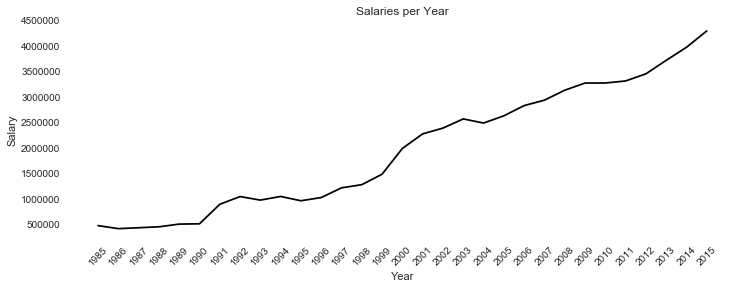

In [38]:
fig, ax = plt.subplots()
fig.set_figwidth(12)

ax.plot(salary_per_year['yearID'], salary_per_year['salary'], color='black')

ax.set_title('Salaries per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Salary')
ax.set_facecolor('white')
ax.set_xticks(salary_per_year['yearID'])
ax.set_xticklabels(salary_per_year['yearID'], rotation=45)

plt.show()

As you cleary can see in the chart the salary drasticly improved over the last 30 years.
From about 50K avg. salary in the year between 1985 to 1990 to over 4.000.000 since 2014.

## Evaluate avg. Salaries per position

### Prepare the Salaries df for merging with the Fielding df

In [135]:
### Copy df in a new var    
df_salaries = data['Salaries.csv'].copy()
### Convert column yearID to string
df_salaries['yearID'] =df_salaries['yearID'].astype('int')
### Sort the df
df_salaries.sort_index(inplace=True)
### Remove any unnessary columns
df_salaries.drop(['lgID'], inplace=True, axis=1)

display(df_salaries.head())

,yearID,teamID,playerID,salary
0,1985,ATL,barkele01,870000
1,1985,ATL,bedrost01,550000
2,1985,ATL,benedbr01,545000
3,1985,ATL,campri01,633333
4,1985,ATL,ceronri01,625000


### Prepare the Fielding df for merging with the Salaries df

In [136]:
### Copy df in a new var
df_fielding = data['Fielding.csv'].copy()
### Convert column yearID to string
df_fielding['yearID'] =df_fielding['yearID'].astype('int')
### Remove any entries < 1985
df_fielding = df_fielding[df_fielding['yearID'] >= 1985]
### Generate a pseudo column consiting of player and year values
df_fielding['player_year'] = df_fielding['playerID'] + ' ' + str(df_fielding['yearID'])
### Remove any duplicates in the pseudo column player_year and keep just the column with the most game appearances
df_fielding = df_fielding.sort_values(by=['G']).drop_duplicates(subset='player_year', keep='last')
### Sort the df
df_fielding.sort_index(inplace=True)
### Remove any unnessary columns
df_fielding = df_fielding[['playerID', 'yearID', 'teamID', 'POS']]

display(df_fielding.head())

,playerID,yearID,teamID,POS
99036,abregjo01,1985,CHN,P
99040,adamsri02,1985,SFN,SS
99046,aikenwi01,1985,TOR,DH
99047,alexado01,1985,TOR,P
99048,allenga01,1985,TOR,C


### Merge the two dfs

In [137]:
### Merge the dfs based on the columns playerID, yearID, teamID
df_merged = df_salaries.merge(df_fielding, how='right', on=['playerID', 'yearID', 'teamID'])

display(df_merged.head())

,yearID,teamID,playerID,salary,POS
0,1985,ATL,barkele01,870000.0,P
1,1985,ATL,campri01,633333.0,P
2,1985,ATL,chambch01,800000.0,1B
3,1985,ATL,dedmoje01,150000.0,P
4,1985,ATL,forstte01,483333.0,P


### Summarize salary per position

In [138]:
### Summarize the salary py position
df_salary_per_position = df_merged.groupby(['POS'],as_index=False).mean()

display(df_salary_per_position.head())

,POS,yearID,salary
0,1B,2000.372549,1.585042e+06
1,2B,2001.227154,1.066668e+06
2,3B,2000.736842,9.512781e+05
3,C,2000.893939,8.060831e+05
4,CF,2001.895522,1.781000e+06


### Chart salaries per main position

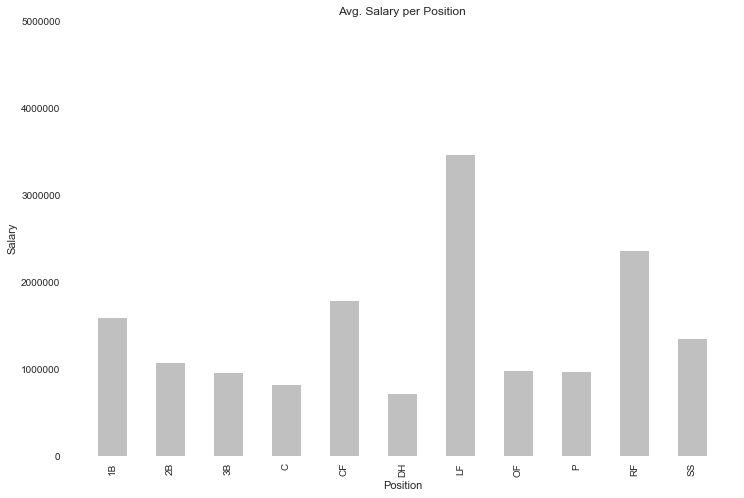

In [139]:
bar_heights = df_salary_per_position['salary'].values
bar_positions = np.arange(df_salary_per_position.shape[0]) + 0.75

fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)

ax.bar(bar_positions, bar_heights, .5, color='silver')
ax.set_title('Avg. Salary per Position')
ax.set_xlabel('Position')
ax.set_ylabel('Salary')
ax.set_ylim([0,5000000])
ax.set_facecolor('white')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_salary_per_position['POS'], rotation=90)

plt.show()

The chart shows that over the past 30 years the players that mostly play as RF gets in average the most salary.